In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets
train_data= pd.read_csv('Edureka_Consumer_Complaints_train.csv',parse_dates=['Date received','Date sent to company'], dayfirst=False)
train_data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Experian,OR,97306,NaN,NaN,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Citibank,OH,43026,NaN,NaN,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,TX,76021,NaN,NaN,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,Encore Capital Group,FL,33256,NaN,NaN,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


In [8]:
#MISSING VALUE RATIO
train_data.isnull().sum()*100/len(train_data)

Date received                    0.000000
Product                          0.000000
Sub-product                     28.925058
Issue                            0.000000
Sub-issue                       61.139322
Consumer complaint narrative    84.342688
Company public response         81.067696
Company                          0.000000
State                            0.809063
ZIP code                         0.811293
Tags                            86.002062
Consumer consent provided?      71.689752
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
Date received                   358810 non-null datetime64[ns]
Product                         358810 non-null object
Sub-product                     255024 non-null object
Issue                           358810 non-null object
Sub-issue                       139436 non-null object
Consumer complaint narrative    56180 non-null object
Company public response         67931 non-null object
Company                         358810 non-null object
State                           355907 non-null object
ZIP code                        355899 non-null object
Tags                            50226 non-null object
Consumer consent provided?      101580 non-null object
Submitted via                   358810 non-null object
Date sent to company            358810 non-null datetime64[ns]
Company response to consumer    358810 non-null object
Timely response?                358810 non-null obj

In [10]:
unique=pd.DataFrame(train_data.nunique(), columns={'Unique'})
unique

,Unique
Date received,1758
Product,12
Sub-product,47
Issue,95
Sub-issue,67
Consumer complaint narrative,55535
Company public response,10
Company,3064
State,62
ZIP code,24181


C:\Users\SVNPSP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


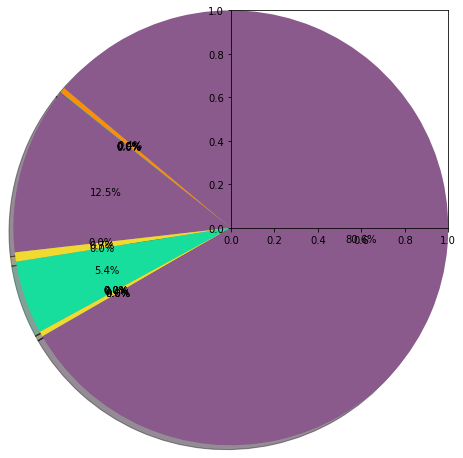

In [11]:
colors = ['#FA8F0A','#F0DA32','#61F527','#18DE9D','#3594FF','#8B5A8C']
plt.pie(unique,colors=colors, autopct='%1.1f%%',shadow=True, startangle=140,frame=True)
plt.show()

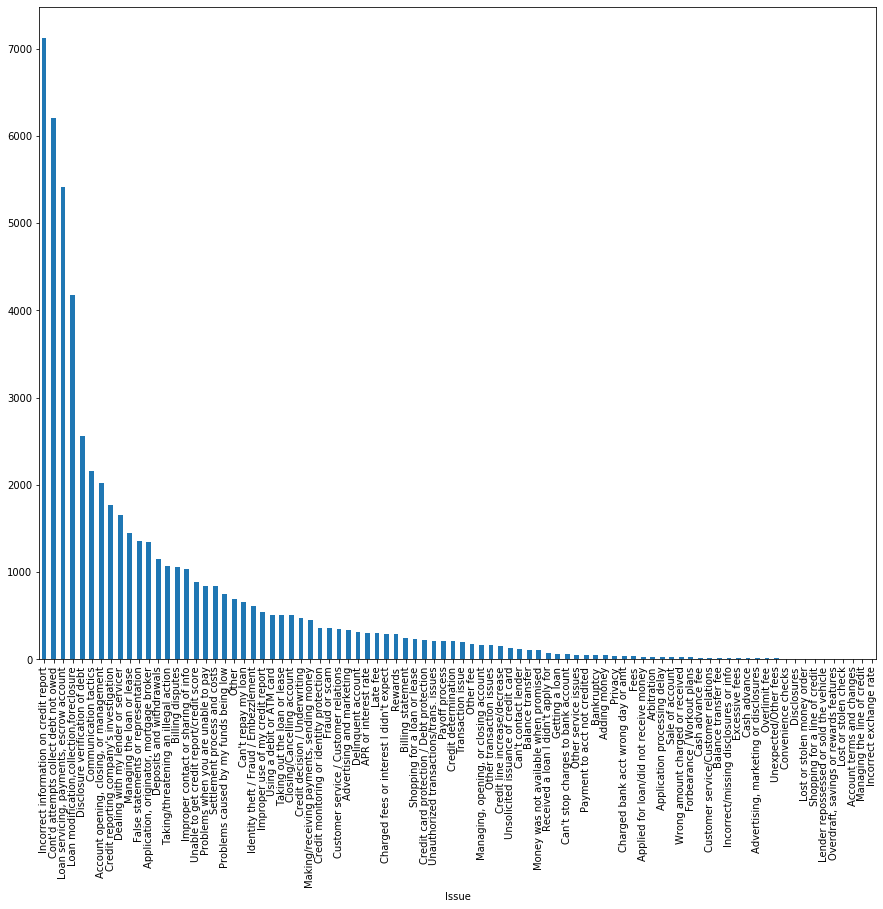

In [12]:
from io import StringIO
col=['Issue','Consumer complaint narrative']
train_data=train_data[col]
train_data=train_data[pd.notnull(train_data['Consumer complaint narrative'])]
train_data.columns=['Issue','Consumer complaint narrative']
fig=plt.figure(figsize=(15,12))
train_data.groupby('Issue')['Consumer complaint narrative'].count().sort_values(ascending=False).plot.bar()
plt.show()

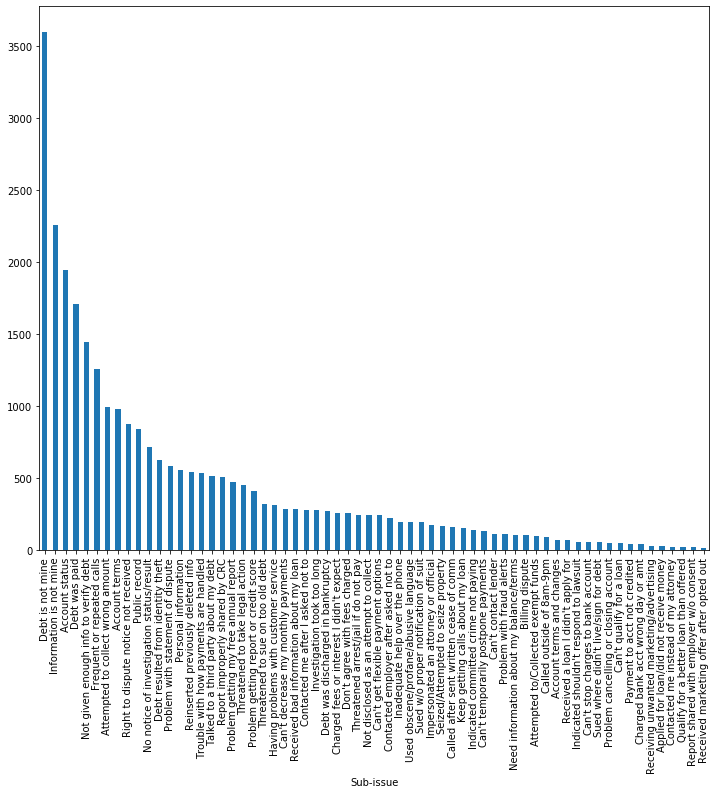

In [15]:
col=['Sub-issue','Consumer complaint narrative']
train_data=train_data[col]
train_data=train_data[pd.notnull(train_data['Consumer complaint narrative'])]
train_data.columns=['Sub-issue','Consumer complaint narrative']
fig=plt.figure(figsize=(12,10))
train_data.groupby('Sub-issue')['Consumer complaint narrative'].count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

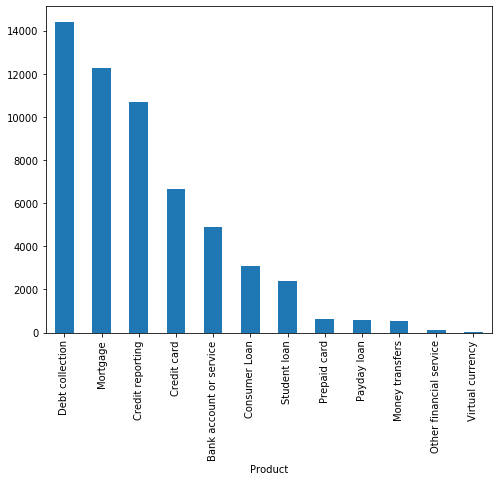

In [73]:
col=['Product','Consumer complaint narrative']
train_data=train_data[col]
train_data=train_data[pd.notnull(train_data['Consumer complaint narrative'])]
train_data.columns=['Product','Consumer complaint narrative']
fig=plt.figure(figsize=(8,6))
train_data.groupby('Product')['Consumer complaint narrative'].count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

Text(0, 0.5, 'Count')

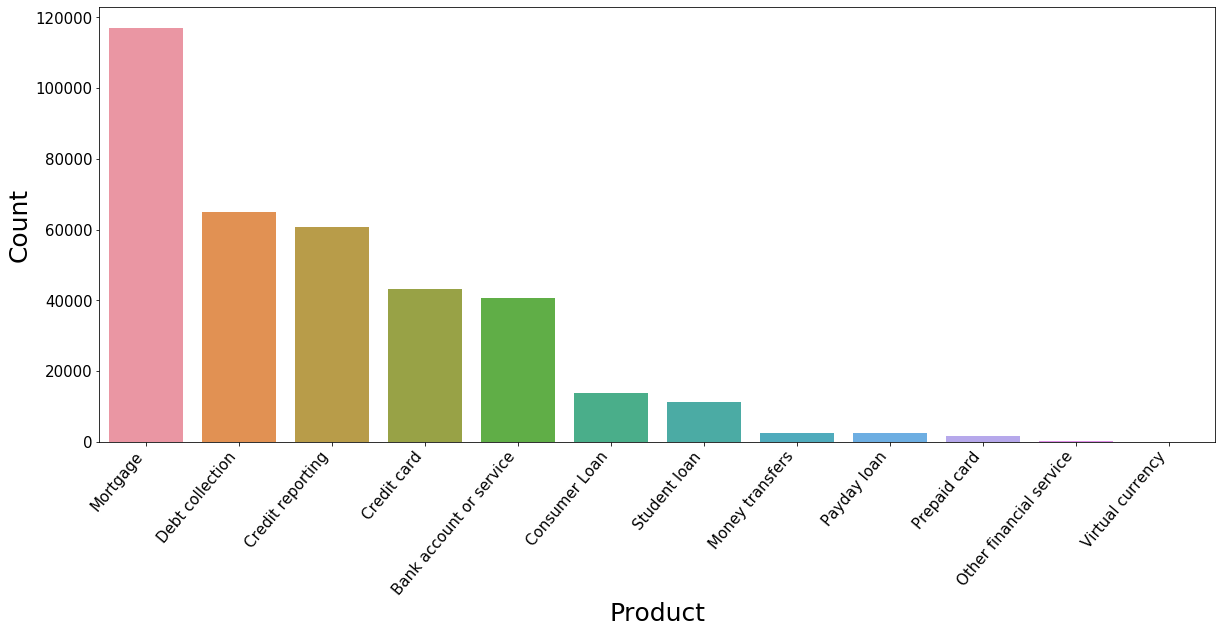

In [36]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=50,fontsize=15, ha='right')
plt.yticks(fontsize=15)
g=sns.countplot(x='Product', data=train_data, order=train_data['Product'].value_counts().index)
g.set_xlabel("Product", fontsize=25)
g.set_ylabel("Count", fontsize=25)

Text(0, 0.5, 'Count')

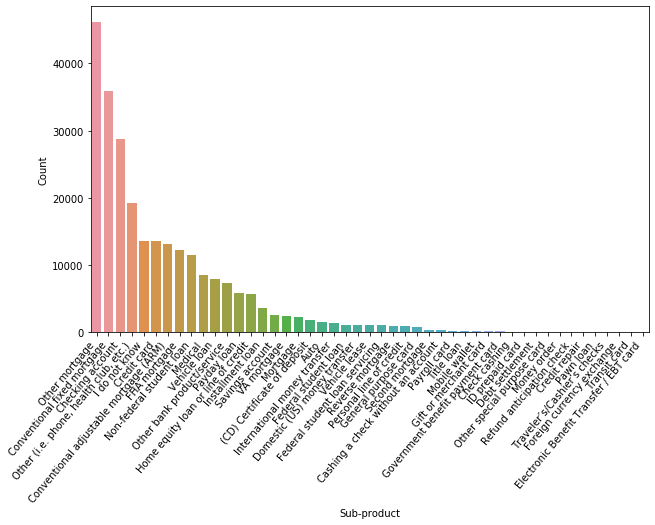

In [47]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=50,fontsize=10, ha='right')
plt.yticks(fontsize=10)
g=sns.countplot(x='Sub-product', data=train_data, order=train_data['Sub-product'].value_counts().index)
g.set_xlabel("Sub-product", fontsize=10)
g.set_ylabel("Count", fontsize=10)

Text(0, 0.5, 'Count')

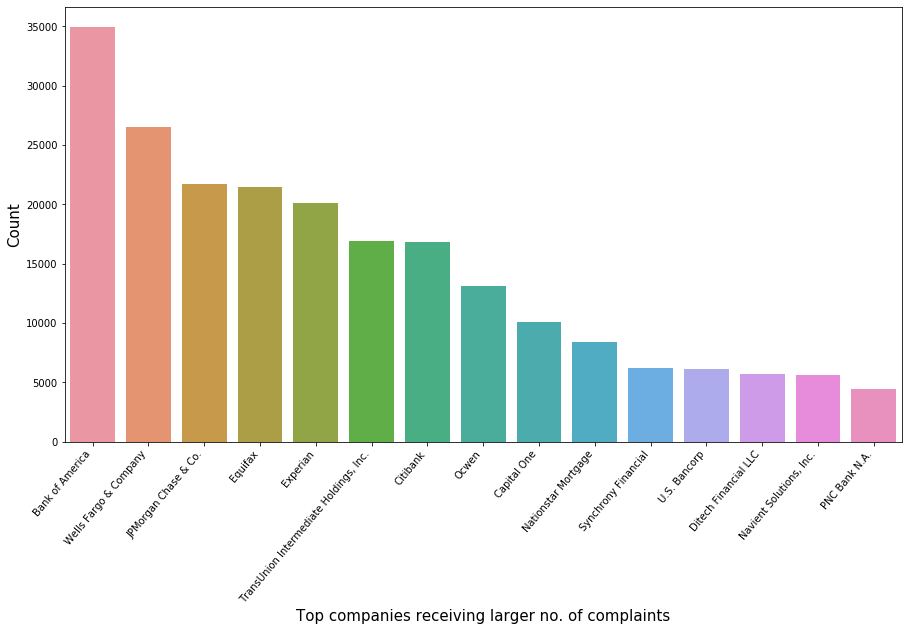

In [39]:
companies=train_data.groupby('Company').Company.count().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=50,fontsize=10, ha='right')
plt.yticks(fontsize=10)
g=sns.barplot(companies.index[0:15],companies.values[0:15])
g.set_xlabel("Top companies receiving larger no. of complaints", fontsize=15)
g.set_ylabel("Count", fontsize=15)

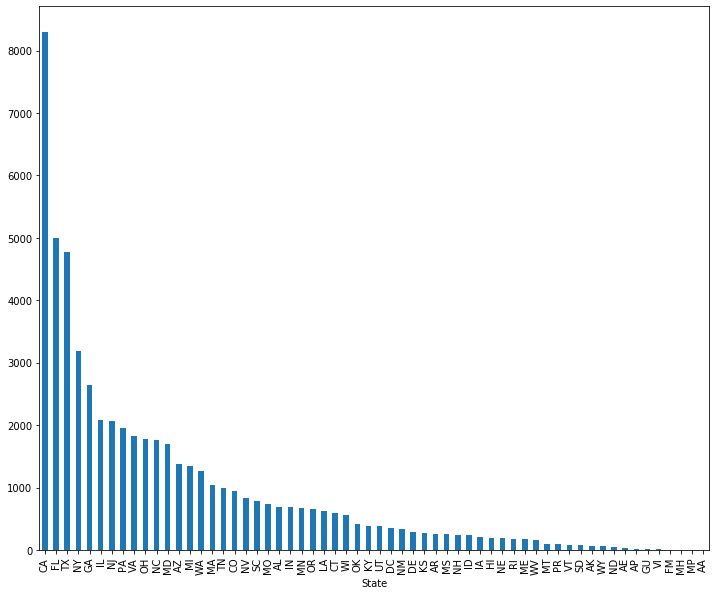

In [90]:
col=['State','Consumer complaint narrative']
train_data=train_data[col]
train_data=train_data[pd.notnull(train_data['Consumer complaint narrative'])]
train_data.columns=['State','Consumer complaint narrative']
fig=plt.figure(figsize=(12,10))
train_data.groupby('State')['Consumer complaint narrative'].count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

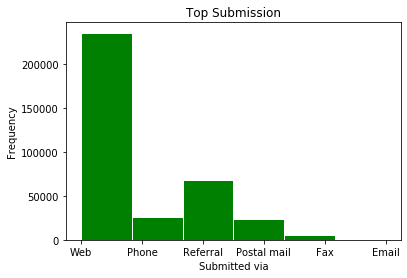

In [20]:
plt.hist(train_data['Submitted via'],color= 'green', edgecolor = 'white',bins = 6)
plt.title('Top Submission')
plt.xlabel('Submitted via')
plt.ylabel('Frequency')
plt.show()

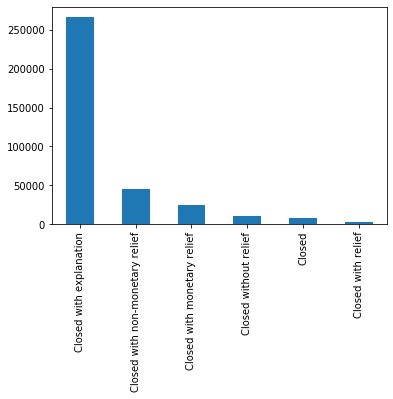

In [41]:
train_data['Company response to consumer'].value_counts().sort_values(ascending=False).plot.bar()

Text(0, 0.5, 'Count')

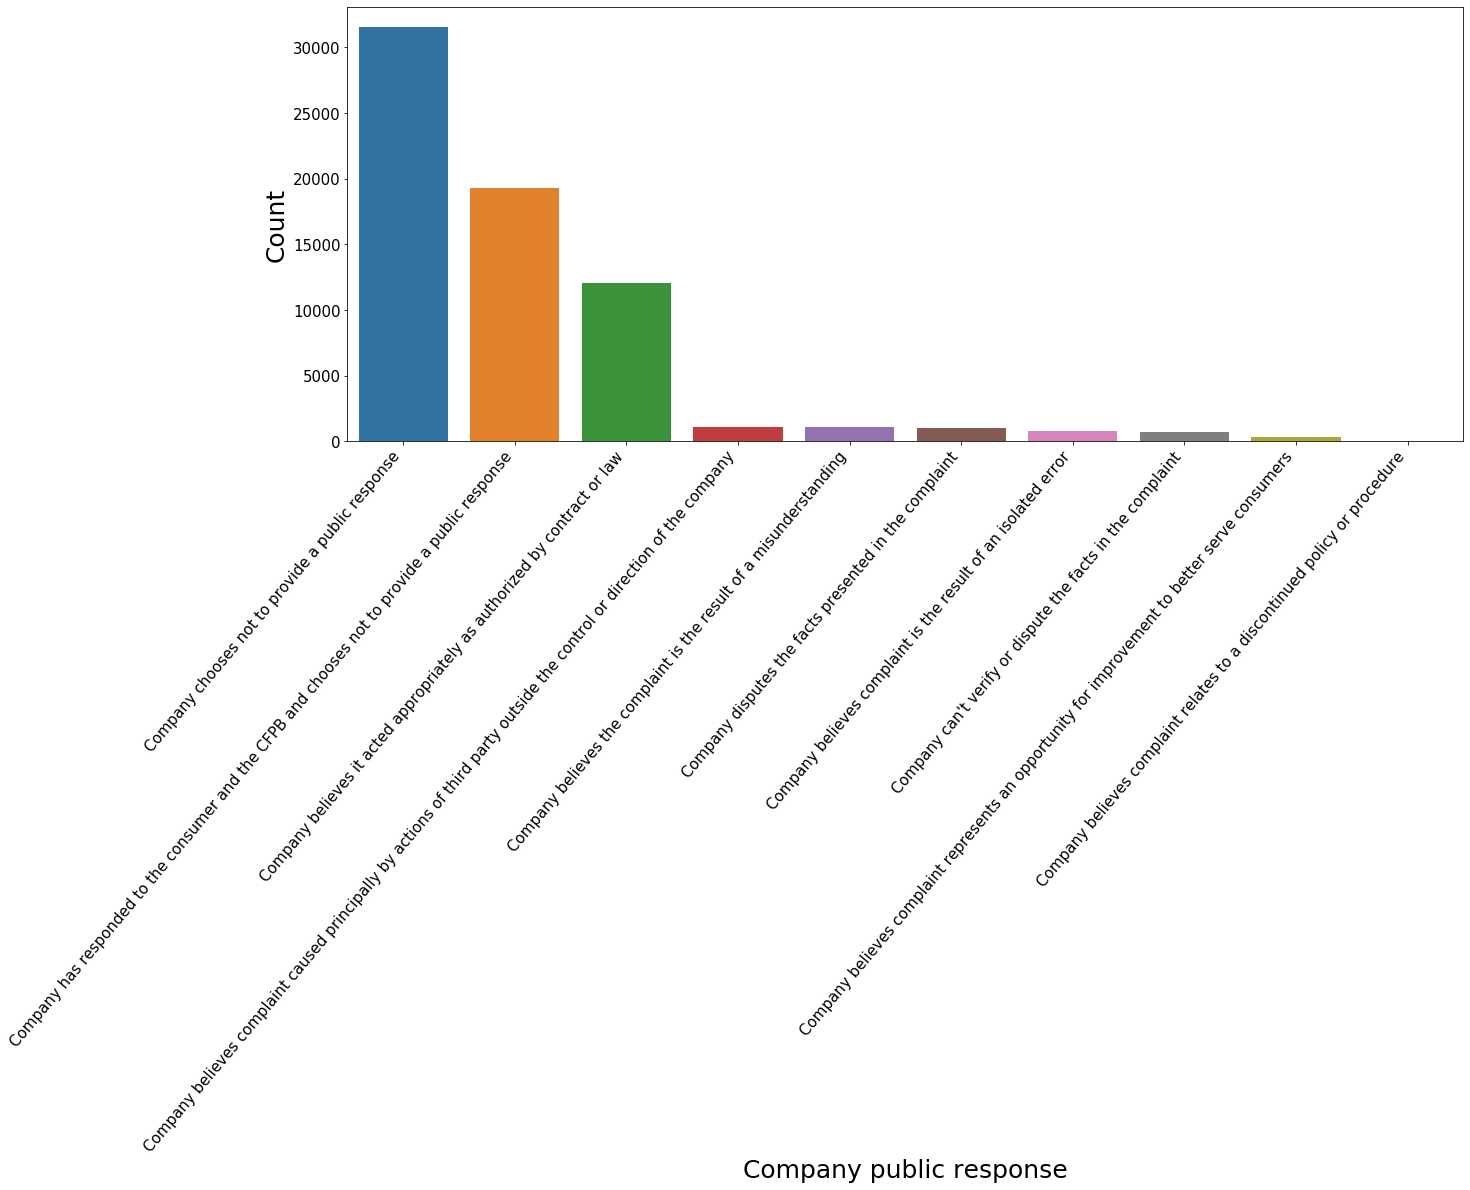

In [35]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=50,fontsize=15, ha='right')
plt.yticks(fontsize=15)
g=sns.countplot(x='Company public response', data=train_data, order=train_data['Company public response'].value_counts().index)
g.set_xlabel("Company public response", fontsize=25)
g.set_ylabel("Count", fontsize=25)

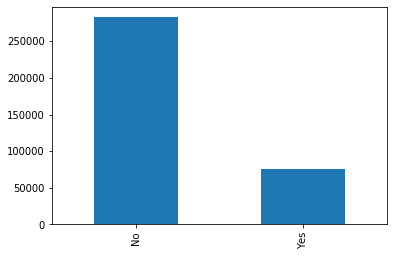

In [56]:
train_data['Consumer disputed?'].value_counts().sort_values(ascending=False).plot.bar()

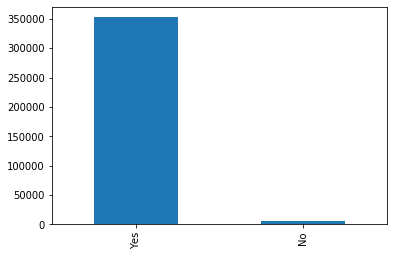

In [3]:
train_data['Timely response?'].value_counts().sort_values(ascending=False).plot.bar()

In [34]:
train_data['Year sent to company']=train_data['Date sent to company'].dt.year
train_data['Month sent to company']=train_data['Date sent to company'].dt.month
train_data['Year received']=train_data['Date received'].dt.year
train_data['Month received']=train_data['Date received'].dt.month

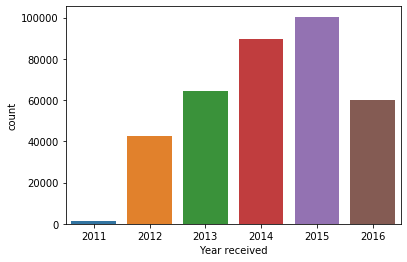

In [21]:
sns.countplot(x='Year received', data=train_data)

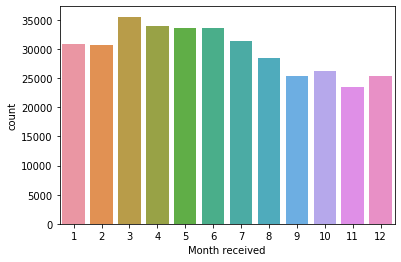

In [23]:
sns.countplot(x='Month received', data=train_data)

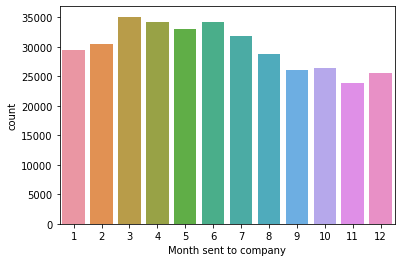

In [24]:
sns.countplot(x='Month sent to company',data=train_data)

Text(0, 0.5, 'Count')

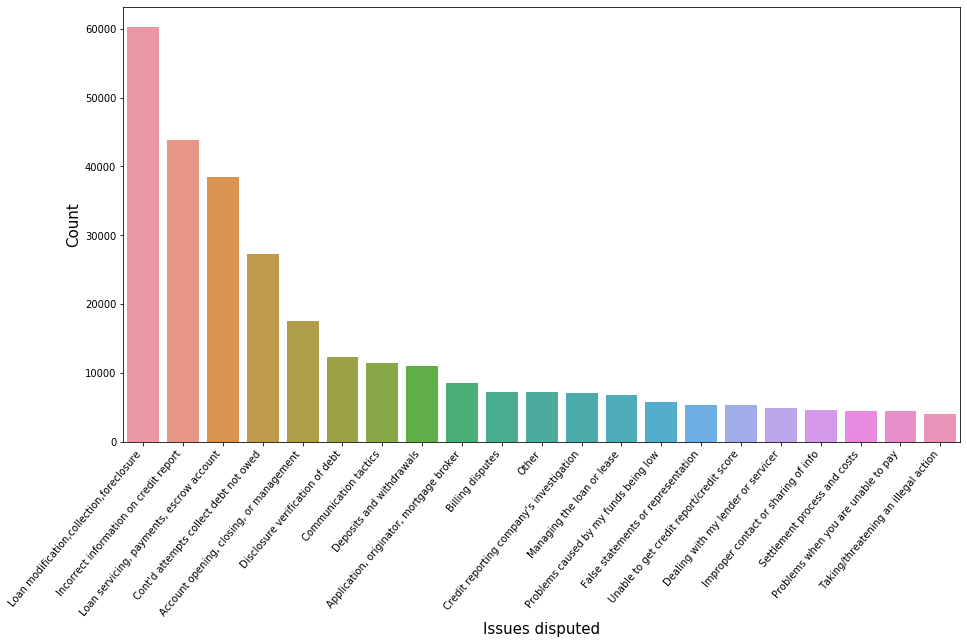

In [2]:
issues=train_data.groupby('Issue')['Consumer disputed?'].count().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=50,fontsize=10, ha='right')
plt.yticks(fontsize=10)
g=sns.barplot(issues.index[0:21],issues.values[0:21])
g.set_xlabel("Issues disputed", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

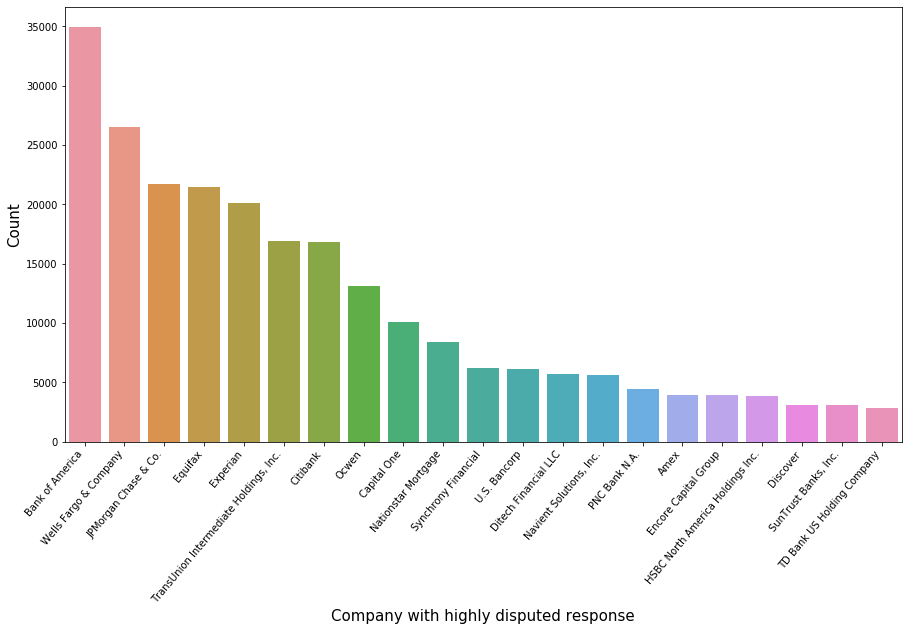

In [4]:
dispute=train_data.groupby('Company')['Consumer disputed?'].count().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=50,fontsize=10, ha='right')
plt.yticks(fontsize=10)
g=sns.barplot(dispute.index[0:21],dispute.values[0:21])
g.set_xlabel("Company with highly disputed response", fontsize=15)
g.set_ylabel("Count", fontsize=15)

Text(0, 0.5, 'Count')

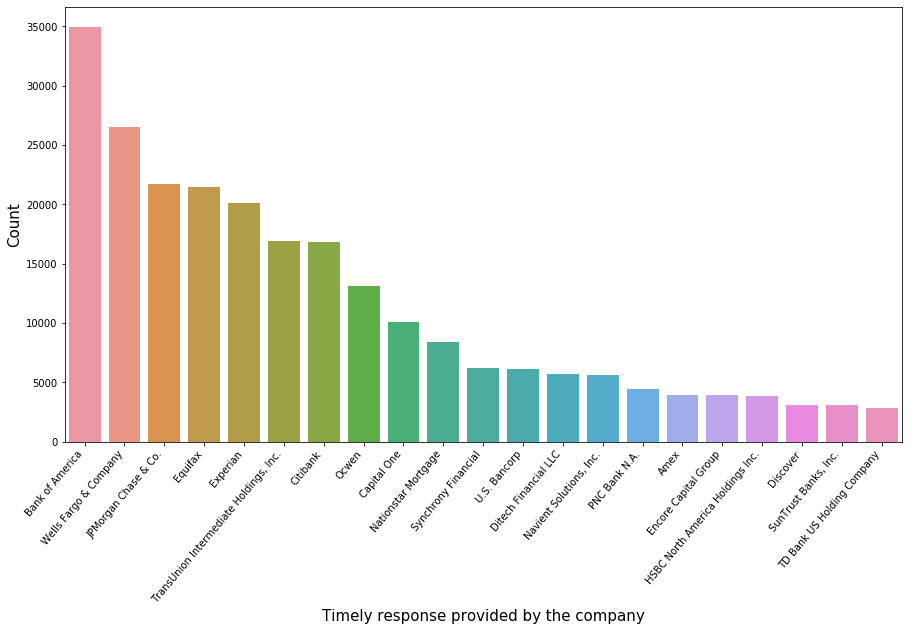

In [5]:
response=train_data.groupby('Company')['Timely response?'].count().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.xticks(rotation=50,fontsize=10, ha='right')
plt.yticks(fontsize=10)
g=sns.barplot(response.index[0:21],response.values[0:21])
g.set_xlabel("Timely response provided by the company", fontsize=15)
g.set_ylabel("Count", fontsize=15)